# The numpy.random Package
***

### 1. Purpose of the package
***
NumPy is a high-performance multidimensional array library and is the core library for scientific computing in Python. A NumPy array is a grid of values of the same type, and is indexed by a tuple of positive integers. The standard Python library provides lists, which is the Python equivalent of a NumPy array, but is resizeable and can contain elements of different types. NumPy data structures perform better in terms of size, performance and functionality. [1] ```numpy.random``` is a subpackage of NumPy which offers a suite of functions based on pseudorandom number generation. [2] It contains some simple random data generation methods, permutation and distribution functions, and random generator functions. 

A random number does not mean generating a different number each time, but rather something that cannot be logically predicted. If a computer programme exists that can generate a random number, it can be predicted, and therefore it is not truly random. Random numbers generated using an algorithm are referred to as "pseudorandom numbers". [3] Pseudorandomness is a sample of numbers that appear to be randomly generated, but were in fact generated using a deterministic process (a probability distribution). They are generated in a sequence that is seeded with an initial number. Although the value of this seed is not important, what is important to note is that the same seeding of the process will result in the same sequence of random numbers. [4] An explanation of the use of seeds in generating pseudorandom numbers will be given in section 5.

The first step in analysing this package is to import the NumPy library as well as the other libraries required in the subsequent sections for plotting arrays.

In [4]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The code below shows how a new Generator is constructed. ```numpy.random.default_nrg()``` is the recommended constructor, which takes one parameter to create a seed to initialise the BitGenerator. In this particular example, the seed is set to 123. If no seed is passed, then fresh, unpredictable entropy will be pulled from the OS. [5] This means that the seed will be based on the current time. The seed will be different each time the programme is run and consequently the sequence of random numbers will also be different with each run. The default BitGenerator used by Generator is PCG64, which will be discussed in more detail in section 5.

In [5]:
# Construct a new Generator
rng = np.random.default_rng(123)
print(rng)

Generator(PCG64)


The following sections will explain the use of the "Simple random data" and "Permutations" functions, explain the use and purpose of eight "Distributions" functions, and explain the use of seeds in generating pseudorandom numbers.

<br>

### 2. Simple random data functions
***
There are four simple random data functions in the ```numpy.random``` package. These are:

1. ```integers()```
2. ```random()```
3. ```choice()```
4. ```bytes()```

#### 2.1. integers(low[, high, size, dtype, endpoint])

This function returns random integers from *low* (inclusive) to *high* (exclusive), or if ```endpoint=True```, *low* (inclusive) to *high* (inclusive). This replaces the ```RandomState.randint()``` and ```RandomState.random_integers()``` functions in the previous version of the API documentation. [6] The function below returns an array comprising 15 intergers between 2 and 12. By setting ```endpoint=True```, the default setting is overwritten and the number 12 is now inclusive in the output.

In [6]:
# Construct a new Generator
rng = np.random.default_rng()
# Create an array of random integers
rng.integers(2, 12, size=15, endpoint=True)

array([11,  6,  6,  3,  8,  3,  5,  2,  8,  3,  5,  6,  3,  4,  3],
      dtype=int64)

If no value is given for *high*, this results in an array ranging from 0 to the *low* value, as shown below. In this instance, ```endpoint=False``` is the default, therefore the *low* value of five is excluded.

In [7]:
# Construct a new Generator
rng = np.random.default_rng()
# Create an array of random integers
rng.integers(5, size=15)

array([1, 3, 3, 1, 4, 1, 3, 3, 1, 3, 3, 2, 3, 0, 2], dtype=int64)

A tuple of integers can also be passed to the *size* parameter. In the example below, an array of size 50 x 20 x 40 is returned. As ```endpoint=True```, the *low* value is included. The results are from the "discrete uniform" distribution, which is also known as the "equally likely outcomes" distribution. [7]

In [8]:
# Construct a new Generator
rng = np.random.default_rng()
# Create three arrays of integers
ax = rng.integers(30, size=(50,20,40), endpoint=True)
ay = rng.integers(40, size=(50,20,40), endpoint=True)
az = rng.integers(50, size=(50,20,40), endpoint=True)
# Print the first array
print(ax)

[[[12 22 25 ... 25  7 26]
  [12 28 16 ... 18 17  3]
  [23 29 15 ...  8  6  9]
  ...
  [20  6 15 ... 15  7 14]
  [27  5  8 ...  7 11 25]
  [19 23 28 ... 23  3 14]]

 [[ 6 28 23 ... 26 13 20]
  [21 17  8 ... 12  8 23]
  [ 3 10 12 ... 26 14 29]
  ...
  [15  4  9 ... 11 12 13]
  [29  8  9 ...  0 19  9]
  [25 23 18 ... 23 13 28]]

 [[ 0 28  0 ...  6  1  2]
  [16  0 21 ... 15  1 11]
  [ 5 27 11 ... 17 16  7]
  ...
  [12  5  4 ... 26 26  4]
  [ 6 22 14 ... 30 22 20]
  [ 2 19 17 ... 24 13  8]]

 ...

 [[19 25 22 ...  9  3 10]
  [14 15 11 ... 11 18  2]
  [ 0  1 27 ... 26 23 17]
  ...
  [ 8 28  3 ... 23  9 20]
  [15 26 23 ... 28  6 24]
  [ 2  7 20 ... 29 19 21]]

 [[11 22 16 ... 24  5 16]
  [ 5 26 11 ... 27 25  9]
  [20 14 17 ...  5 12 22]
  ...
  [ 1 30 10 ... 17 19 28]
  [11 18 16 ... 12 14 10]
  [23  2  6 ... 27 15 28]]

 [[30 28 11 ...  8  4  9]
  [11 13 23 ... 23 20 26]
  [28 11 17 ... 15  4 29]
  ...
  [ 7 28  1 ...  9  2 18]
  [20 18 19 ... 13 26 13]
  [19 12  9 ...  4  3  4]]]


It is clear from the two plots below that the probability density is approximately equal for each integer in each array. One observation that can be made here is that that the peak of the curve is flatter as the *low* value increases.

In [ ]:
# Create a plot of each array, but exclude histogram
sns.distplot(ax, label="low = 30", hist=False)
sns.distplot(ay, label="low = 40", hist=False)
sns.distplot(az, label="low = 50", hist=False)
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Discrete Uniform Distribution")
plt.grid()

The mean of each array is approximately half of what the passed *low* value for each array is.

In [ ]:
# Get the mean of each array
print(np.mean(ax))
print(np.mean(ay))
print(np.mean(az))

The histogram below also illustrates how the returned random integers are from the discrete uniform distribution. Each value of the random variable is equally likely, and the values of the random variable are uniformly distributed. [8] The uniform distribution is discussed in more detail in section 4.8.

In [ ]:
# Plot a histogram of the ax array
sns.distplot(ax)
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.title("Discrete Uniform Distribution (ax array)")
plt.grid()

#### 2.2 random([size, dtype, out])

This function returns random floats in the half-open interval [0.0, 1.0). A half-open (or half-closed) interval is an interval in which one endpoint is included, but not the other. It is denoted [a, b) or (a, b]. [9][10] In this instance, $0.0≤x<1.0$. The function below returns a 3 x 4 x 5 array of floats between 0.0 (inclusive) and 1.0 (exclusive).

In [9]:
# Construct a new Generator
rng = np.random.default_rng()
# Create an array of random floats
rng.random((3,4,5))

array([[[0.99491682, 0.08793424, 0.54533371, 0.22716038, 0.38933692],
        [0.02085757, 0.71052061, 0.65904514, 0.34125598, 0.29775889],
        [0.27854601, 0.45485316, 0.12531068, 0.38443541, 0.37471273],
        [0.5260018 , 0.99047121, 0.1948918 , 0.2080591 , 0.77889623]],

       [[0.93262877, 0.49112879, 0.75328755, 0.3096128 , 0.22079744],
        [0.75631705, 0.65137765, 0.76373978, 0.69455484, 0.98441216],
        [0.61866719, 0.30076658, 0.16705362, 0.0648889 , 0.45908797],
        [0.67075436, 0.86779622, 0.39892377, 0.9714805 , 0.32178345]],

       [[0.83633993, 0.76710215, 0.26694494, 0.53045745, 0.12060439],
        [0.89891783, 0.7455403 , 0.94694688, 0.35597823, 0.62327884],
        [0.94791543, 0.36513152, 0.55911082, 0.22760858, 0.66839287],
        [0.67263159, 0.3497051 , 0.7597564 , 0.55457905, 0.93106103]]])

The function below returns an array of 500 floats between 0.0 and 1.0. Results are from the "continuous uniform" distribution over the stated interval, and therefore the mean of these numbers is approximpately 0.5. [11]

In [10]:
# Construct a new Generator
rng = np.random.default_rng()
# Create an array of random floats
b = rng.random(1000)
# Print the array
print(b)

[6.91029410e-01 5.31695410e-01 3.19603008e-01 3.82142173e-01
 8.52218922e-01 4.87955252e-01 5.84377554e-01 9.60767027e-01
 2.64470333e-01 8.50353502e-01 9.14797612e-01 5.81150653e-01
 2.24644840e-02 4.09783236e-01 4.69531295e-01 2.32682959e-01
 7.63683067e-01 4.60604121e-02 5.27222618e-01 8.95376947e-01
 7.51042047e-01 2.23647504e-01 8.08300170e-01 4.69810969e-01
 5.05689279e-02 1.29638705e-01 1.82140112e-01 1.38965362e-01
 7.12715986e-01 9.29913210e-01 3.07132072e-02 9.88846156e-01
 5.99378979e-01 1.05265277e-01 8.27418084e-01 4.09479804e-01
 7.45403000e-01 8.33078621e-01 4.80038480e-01 4.30580544e-01
 3.14133069e-01 9.40906799e-01 3.31475317e-01 6.43638999e-01
 8.62537604e-01 7.12277753e-01 5.87774043e-02 3.97848961e-01
 5.47000864e-01 8.91200318e-01 7.13995913e-01 6.04309159e-01
 1.82743649e-02 2.01680524e-01 9.99776595e-01 8.91523478e-01
 5.49337846e-01 9.10725113e-01 4.05155742e-01 8.42775694e-01
 7.13588919e-01 9.81559458e-01 3.48716412e-02 5.92951554e-01
 5.42308279e-01 3.520138

The ```numpy.mean()``` function can be used to get the mean of the array, which is approximately 0.5. [12]

In [11]:
# Get the mean of the array
np.mean(b)

0.49686559354414667

Graphically, the probability density function is portrayed almost as a rectangle, as per the plot below as the probability density is approximately 1.0 for each bin. [13]

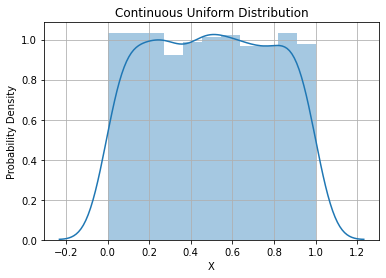

In [12]:
# Create a plot of the array
sns.distplot(b)
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.title("Continuous Uniform Distribution")
plt.grid()

#### 2.3. choice(a[, size, replace, p, axis, shuffle])

This function generates a random sample from a given 1-D array. [14] The function below returns an array comprising four intergers between 1 and 10 (exclusive). If an integer is given, a random integer is returned from ```numpy.arange(a)```.

In [13]:
# Construct a new Generator
rng = np.random.default_rng()
# Create an array of integers between 1 and 10 (exclusive)
rng.choice(10, 4)

array([7, 4, 6, 5], dtype=int64)

The example below returns a value between 0 (inclusive) and 10 (exclusive) as values are generated within the half open interval [start, stop). [15]

In [14]:
# Construct a new Generator
rng = np.random.default_rng()
# Return a value between 0 and 10 (exclusive)
rng.choice(10)

3

The function can also be used to select a random item from a list as shown below. [16]

In [15]:
# Construct a new Generator
rng = np.random.default_rng()
# Create a list
numberList = [111, 222, 333, 444, 555]
# Output a random value from the list
print(rng.choice(numberList))

555


A tuple of integers can also be passed to the *size* parameter. In the example below, an array of size 3 x 2 x 3 is returned. The values are between 0 (inclusive) and 18 (exclusive). By setting ```replace=False```, no integer is repeated in the output. An error would occur if the input was less than 18 in this case, as there would not be enough unique integers. [17]

In [16]:
# Construct a new Generator
rng = np.random.default_rng()
# Create an array of unique values
c = rng.choice(18, size=[3,2,3], replace=False)
print(c)

[[[17  9 12]
  [10  0 16]]

 [[ 1  5 11]
  [13  8 14]]

 [[15  7  6]
  [ 2  3  4]]]


#### 2.4. bytes(length)

This function returns random bytes as a string. [18] The function below returns five bytes.

In [17]:
# Construct a new Generator
rng = np.random.default_rng()
# Return five random bytes
rng.bytes(5)

b'\xc5I\xd5\xfb\xe0'

The example below outputs 10 rows of bytes increasing in length by one byte with each iteration. [19]

In [18]:
# Construct a new Generator
rng = np.random.default_rng()
# Output a string of bytes, incrementing by 1 each time
for length in range(10):
    print(length, ": ", rng.bytes(length))

0 :  b''
1 :  b'\xaf'
2 :  b'\xea\x14'
3 :  b'\xa2+\xb2'
4 :  b'R\xe4\xf5.'
5 :  b'\xfeVo>\xc9'
6 :  b'\xe8W\xbb\xf8\x85\r'
7 :  b'\x0e\xa4\xd0\xe6\xb3\xfa\x05'
8 :  b';\x12d\xbc\x0c\xee\x0f\xa7'
9 :  b'\x12\xf8\x95z\xd9b\xa4\xfce'


<br>

### 3 Permutations functions
***
There are two permutation functions in the ```numpy.random``` package used for rearranging the elements of an array. These are:

1. ```shuffle()```
2. ```permutation()```

#### 3.1. shuffle(x[, axis])

This function modifies a sequence in-place by shuffling its contents. [20] The function below takes a list of sequential integers as input and reorganises the items.  

In [19]:
# Construct a new Generator
rng = np.random.default_rng()
# Create a list of integers
shuffle_lst = [1, 2, 3, 4, 5]
# Shuffle the values in the list
rng.shuffle(shuffle_lst)
# Print the shuffled list
print(shuffle_lst)

[2, 3, 5, 1, 4]


The function below returns an array of size 3 x 3 x 2 with values between 0.0 and 1.0. The subsequent code shuffles the order of the first axis only, while the order of the others remain unchanged.

In [20]:
# Construct a new Generator
rng = np.random.default_rng()
# Create an array of random floats
shuffle_array = rng.random((3,3,2))
# Print array
print(shuffle_array)

[[[0.05328927 0.01238962]
  [0.59164593 0.35034226]
  [0.08614724 0.85678781]]

 [[0.01801073 0.05156342]
  [0.49509835 0.57385184]
  [0.14308115 0.73737298]]

 [[0.68677476 0.79352476]
  [0.56437953 0.4386707 ]
  [0.41151378 0.55816324]]]


In [21]:
# Shuffle the array
rng.shuffle(shuffle_array)
# Print the shuffled array
print(shuffle_array)

[[[0.05328927 0.01238962]
  [0.59164593 0.35034226]
  [0.08614724 0.85678781]]

 [[0.01801073 0.05156342]
  [0.49509835 0.57385184]
  [0.14308115 0.73737298]]

 [[0.68677476 0.79352476]
  [0.56437953 0.4386707 ]
  [0.41151378 0.55816324]]]


#### 3.2. permutation(x[, axis])

This function randomly permutes a sequence, or returns a permuted range. The difference between this and the ```shuffle()``` function is that ```permutation()``` returns a re-arranged array while leaving the original array unchanged. [21]

In [22]:
# Construct a new Generator
rng = np.random.default_rng()
# Create an array
perm_array = [1, 2, 3, 4, 5]
# Print the permuted array
print("Permuted array: ", rng.permutation(perm_array))
# Print the original array
print("Original array: ", perm_array)

Permuted array:  [2 1 3 4 5]
Original array:  [1, 2, 3, 4, 5]


If passed an integer, the function will return a shuffled range as shown below. [22] An error would occur if ```shuffle()``` was used instead.

In [23]:
# Output a shuffled array of values in the range 0-9
rng.permutation(10)

array([2, 1, 6, 8, 3, 4, 5, 7, 9, 0])

<br>

### 4. Distributions functions
***
There are 35 distribution functions in the ```numpy.random``` package. Eight of these are listed below and will be discussed in this section.

1. ```chisquare()``` 
2. ```exponential()```
3. ```geometric()``` 
4. ```normal()``` 
5. ```rayleigh()``` 
6. ```standard_t()``` 
7. ```triangular()``` 
8. ```uniform()```

All of these distribution functions have a *size* parameter, which tells NumPy how many numbers to generate. This can be specified by either an integer or a tuple. Passing a tuple will result in an array filled with random numbers of a defined shape.

The “empirical cumulative distribution function” (ECDF) is used to visualise and compare each distribution. In an ECDF, the x-axis corresponds to the range of values for variables and the y-axis shows the proportion of data points that are less than are equal to corresponding x-axis value. [23] The ECDF is useful as it approximates the true CDF well if the sample size is large, and knowing the distribution is helpful for statistical inference. The resulting plot can be visually compared to known CDFs to check if the data originated from one of those frequently used distributions. It can also illustrate “how fast” the CDF increases to 1. [24] It is useful to plot the ECDF first, as it shows all the data and gives a complete picture of how the data are distributed. A function is defined below to calculate the ECDF and will be applied throughout this section. [23]

In [24]:
# Define a function to calculate the ECDF
def ecdf(df, col):
    # Create a sorted copy of the array
    x = np.sort(df)
    # Count the elements along the x-axis and calculate the proportion of data points less than each data point
    n = x.size
    y = np.arange(1, n+1) / n
    # Create a plot of the array
    plt.scatter(x=x, y=y, s=5, color=col)

#### 4.1. chisquare(df[, size])

This function draws samples from a chi-square distribution, and helps in understanding the relationship between two categorical variables. It helps to compare what is observed with what is expected, and is used as a basis to verify a hypothesis. [25] It has two parameters: *df* (degree of freedom) and *size* (the shape of the returned array). [26] The degree of freedom must be greater than zero and is broadly defined as the number of "observations" in the data that are free to vary when estimating statistical parameters. [27]

The test can be expressed as:

$x^{2} = \sum\frac{(O-E)^{2}}{E}$

where *O* is the number of observed events and *E* is the number of expected events under the null hypothesis.

The ```chisquare()``` function below creates three 30 x 60 arrays with different degrees of freedom.

In [27]:
# Construct a new Generator
rng = np.random.default_rng()
# Create three arrays with different degrees of freedom
dx = rng.chisquare(df=20, size=(30,60))
dy = rng.chisquare(df=60, size=(30,60))
dz = rng.chisquare(df=100, size=(30,60))
# Print the first array
print(dx)

[[29.74874014 21.97090586 37.0956646  ... 13.15067011 20.55885704
   9.66857707]
 [19.05553989 20.6766126  22.78050449 ... 15.34840797 24.33642964
  33.11080027]
 [19.71695936 17.4007977  16.42437146 ... 17.72425743 20.16682773
  31.0108674 ]
 ...
 [19.17082919 13.7482379  19.46360319 ... 24.10364651 26.31902164
  16.70082548]
 [14.78009365 25.26552096 22.05686405 ... 20.48776836 14.76746734
  28.50007432]
 [16.22661903 16.58449029 10.84470946 ... 21.64979585 17.8048069
  27.2879237 ]]


The ECDF of the distribution shows how each distribution concentrates around the degree of freedom along the x-axis. This is expected, as the mean of this particular type of distribution is the same as its degree of freedom. The points in the array with the lowest degree of freedom (10) look much more condensed than those in the array with the highest degree of freedom (100).

In [29]:
# Find the mean value of each array
print("Mean of dx array: ", np.mean(dx))
print("Mean of dy array: ", np.mean(dy))
print("Mean of dz array: ", np.mean(dz))

Mean of dx array:  20.02010310935751
Mean of dy array:  59.906955476140446
Mean of dz array:  100.50510672172095


The three plots below illustrate the ECDF of each array individually, with the mean indicated by a red line.

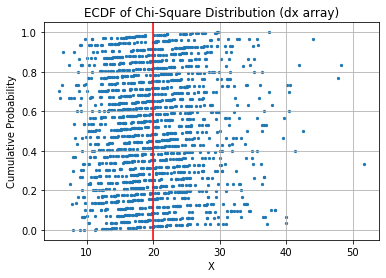

In [30]:
# Call the ECDF function
ecdf(dx, "#1f77b4")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title('ECDF of Chi-Square Distribution (dx array)')
# Draw a vertical line to indicate degree of freedom (mean)
plt.axvline(20, color="red")
plt.grid()

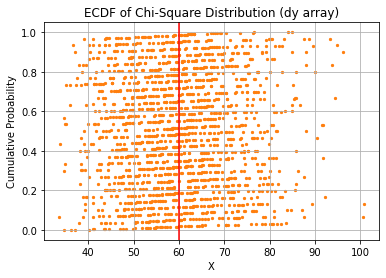

In [31]:
# Call the ECDF function
ecdf(dy, "#ff7f0e")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title("ECDF of Chi-Square Distribution (dy array)")
# Draw a vertical line to indicate degree of freedom (mean)
plt.axvline(60, color="red")
plt.grid()

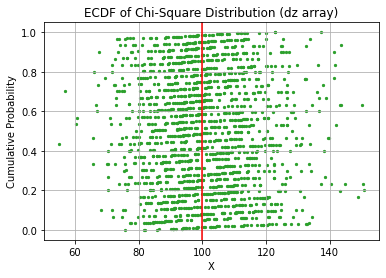

In [32]:
# Call the ECDF function
ecdf(dz, "#2ca02c")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title("ECDF of Chi-Square Distribution (dz array)")
# Draw a vertical line to indicate degree of freedom (mean)
plt.axvline(100, color="red")
plt.grid()

The plot below illustrates the ECDF of each array combined to help visualise how the degree of freedom affects the distribution of the data.

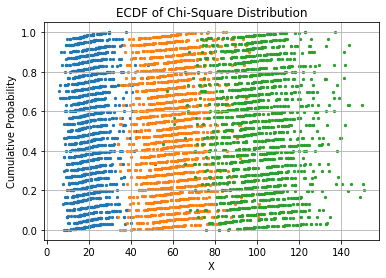

In [33]:
# Call the ECDF function for each array
ecdf(dx, "#1f77b4"), ecdf(dy, "#ff7f0e"), ecdf(dz, "#2ca02c")
plt.xlabel('X'), plt.ylabel('Cumulative Probability'), plt.title('ECDF of Chi-Square Distribution')
plt.grid()

The kernel density plot below shows how the probability density peaks at approximately the *df* value on the x-axis of each distribution. [28] The distribution is also wider along the x-axis and shorter along the y-axis as the degree of freedom increases. Chi-Square distributions are positively skewed, with the degree of skew decreasing as the degree of freedom increases. [29] It is clear from the "dz" array below that as the degree of freedom increases, the Chi-Square distribution begins to look like a normal distribution (section 4.4).

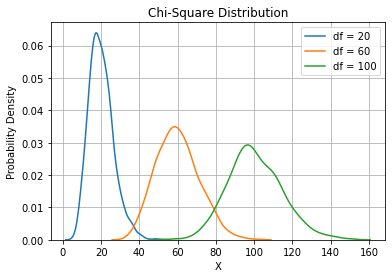

In [34]:
# Plot the three arrays with different degrees of freedom
sns.distplot(dx, label="df = 20", hist=False)
sns.distplot(dy, label="df = 60", hist=False)
sns.distplot(dz, label="df = 100", hist=False)
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Chi-Square Distribution")
plt.grid()

As shown in the ECDF plots, the histograms below shows how the data concentrates around the degree of freedom (i.e. mean) along the x-axis.

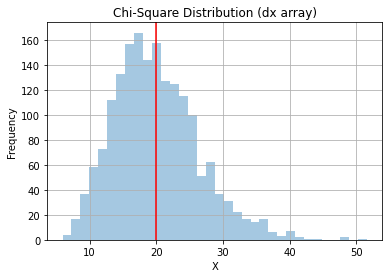

In [35]:
# Plot a histogram of the array
sns.distplot(dx, kde=False, color="#1f77b4")
plt.axvline(20, color="red")
plt.xlabel("X"), plt.ylabel("Frequency"), plt.title("Chi-Square Distribution (dx array)")
plt.grid()

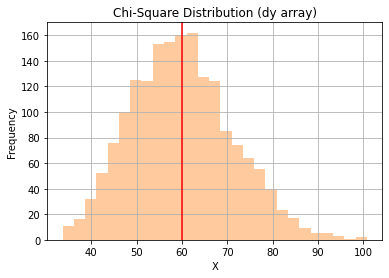

In [36]:
# Plot a histogram of the array
sns.distplot(dy, kde=False, color="#ff7f0e")
plt.axvline(60, color="red")
plt.xlabel("X"), plt.ylabel("Frequency"), plt.title("Chi-Square Distribution (dy array)")
plt.grid()

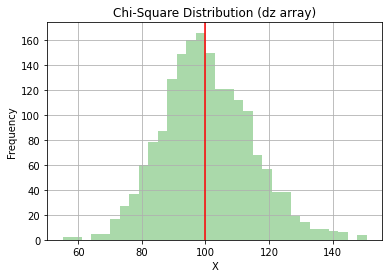

In [37]:
# Plot a histogram of the array
sns.distplot(dz, kde=False, color="#2ca02c")
plt.axvline(100, color="red")
plt.xlabel("X"), plt.ylabel("Frequency"), plt.title("Chi-Square Distribution (dz array)")
plt.grid()

#### 4.2. exponential([scale, size])

This function draws samples from an exponential distribution, which is used for describing the time until the next event e.g. failure/success etc. [30] It is closely related to the poisson distribution, which helps answer questions such as the number of events that occur in an interval of time. On the other hand, an exponential distrubution answers the time taken between two events occuring. It has two parameters: *scale* and *size*. The *scale* parameter must be non-negative.

The probability density function can be expressed as:

$f(x; \frac{1}{\beta}) = \frac{1}{\beta} exp(-\frac{x}{\beta})$

for x > 0 and 0 elsewhere. $\beta$ is the scale parameter, which is the inverse of the rate parameter $\lambda = 1/\beta$. [31]

The ```exponential()``` function below creates three 10 x 20 arrays with different scales.

In [39]:
# Create three arrays with different scales
ex = rng.exponential(scale=1, size=(10, 20))
ey = rng.exponential(scale=2, size=(10, 20))
ez = rng.exponential(scale=3, size=(10, 20))
# Print the first array
print(ex)

[[2.13994635 1.96939155 0.07972611 2.29211323 0.41238175 0.20495193
  0.41773287 0.38695413 0.74978071 0.73281905 1.79844452 0.46430787
  0.01822423 0.18847287 3.95362047 0.37857577 0.22848788 0.79916117
  1.58928326 1.53224948]
 [0.63341026 1.93995009 1.20159929 0.0528095  2.46003892 0.28954976
  3.13082023 0.17832939 0.5949136  0.29651062 1.34481776 0.04042071
  1.89358287 1.62221501 0.26123717 0.26937051 1.91295122 2.00420108
  0.55298881 0.82228681]
 [1.75369184 1.30574669 0.05297531 1.58157439 0.46061321 0.20189328
  0.61049947 1.32847465 0.51336787 0.02634631 0.59405888 0.09906426
  2.68715036 0.12057943 0.54448223 0.03867957 0.15670424 0.54972399
  0.34077713 0.51831697]
 [0.0874728  0.849978   0.16415337 0.34750407 0.95215852 0.34226369
  0.32301669 0.07522841 0.61276016 1.04499647 0.71613302 1.46570824
  1.07628323 0.80795279 0.13530982 0.02505367 0.54090298 0.04285018
  0.87108634 0.59709897]
 [0.52278095 1.81476921 4.74330886 0.16215763 0.87367259 0.01322741
  0.50492129 1.3

The ECDF of the distributions show how most of the data is close to 0 on the x-axis. Arrays with a larger scale value results in more higher values along the x-axis. The three plots below illustrate the ECDF of each array individually, with the mean indicated by a red line.

In [41]:
# Find the mean value of each array
print("Mean of ex array: ", np.mean(ex))
print("Mean of ey array: ", np.mean(ey))
print("Mean of ez array: ", np.mean(ez))

Mean of ex array:  0.7886501457273011
Mean of ey array:  1.9708487633722283
Mean of ez array:  3.0682135534996995


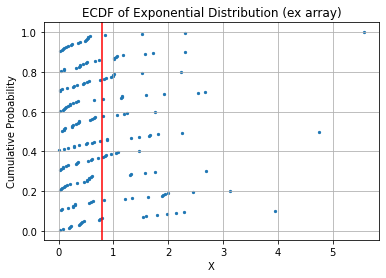

In [42]:
# Call the ECDF function
ecdf(ex, "#1f77b4")
plt.axvline(np.mean(ex), color="red")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title('ECDF of Exponential Distribution (ex array)')
plt.grid()

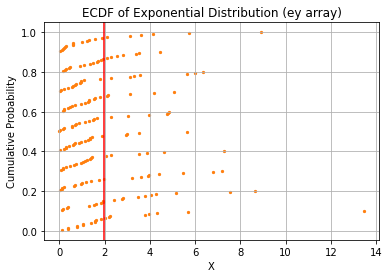

In [43]:
# Call the ECDF function
ecdf(ey, "#ff7f0e")
plt.axvline(np.mean(ey), color="red")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title('ECDF of Exponential Distribution (ey array)')
plt.grid()

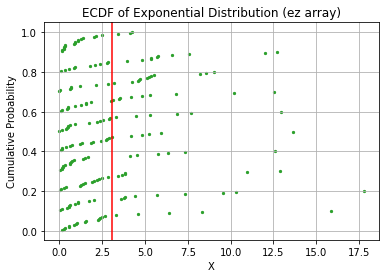

In [44]:
# Call the ECDF function
ecdf(ez, "#2ca02c")
plt.axvline(np.mean(ez), color="red")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title('ECDF of Exponential Distribution (ez array)')
plt.grid()

The plot below illustrates the ECDF of each array combined to help visualise how different scales affect the distribution of the data.

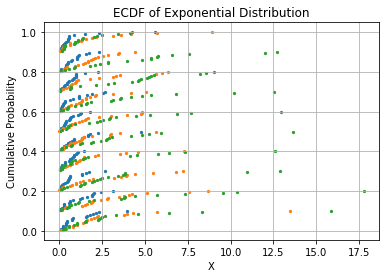

In [45]:
# Call the ECDF function for each array
ecdf(ex, "#1f77b4"), ecdf(ey, "#ff7f0e"), ecdf(ez, "#2ca02c")
plt.xlabel('X'), plt.ylabel('Cumulative Probability'), plt.title('ECDF of Exponential Distribution')
plt.grid()

The kernel density plot below shows how the probability density is much higher at a smaller scale and tapers off quite quickly for higher values of x. The peaks of the other two arrays are much lower. An exponential function can describe growth or decay. The function

$g(x) = (\frac{1}{2})^x$

is an example of exponential decay. It gets rapidly smaller as the value on the x-axis increases. [32] This is evident in the kernel density plot below.

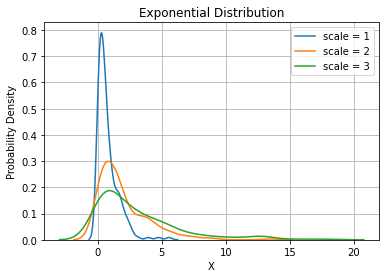

In [46]:
# Plot the three arrays with different scales
sns.distplot(ex, label="scale = 1", hist=False)
sns.distplot(ey, label="scale = 2", hist=False)
sns.distplot(ez, label="scale = 3", hist=False)
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Exponential Distribution")
plt.grid()

As shown in the ECDF plots, the histograms below shows how most of the data is skewed left in each array.

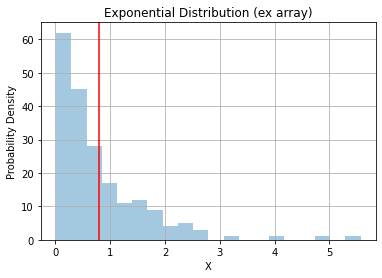

In [47]:
# Plot a histogram of the array
sns.distplot(ex, kde=False, color="#1f77b4")
plt.axvline(np.mean(ex), color="red")
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Exponential Distribution (ex array)")
plt.grid()

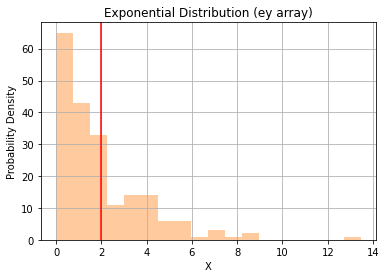

In [48]:
# Plot a histogram of the array
sns.distplot(ey, kde=False, color="#ff7f0e")
plt.axvline(np.mean(ey), color="red")
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Exponential Distribution (ey array)")
plt.grid()

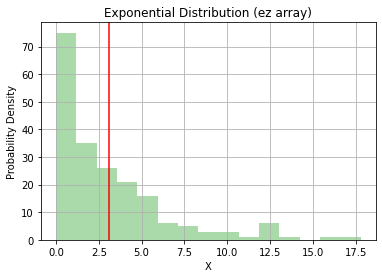

In [49]:
# Plot a histogram of the array
sns.distplot(ez, kde=False, color="#2ca02c")
plt.axvline(np.mean(ez), color="red")
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Exponential Distribution (ez array)")
plt.grid()

#### 4.3. geometric(p[, size])

This function draws samples from the geometric distribution. A Bernoulli trial is a random experiment with exactly two possible outcomes, "success" and "failure" (e.g. flipping a coin), in which the probability of success is the same every time the experiment is conducted. [33] The geometric distribution models the number of trials that must be run in order to achieve success. It takes two parameters: *p* and *size*.

The probability density function can be expressed as:

$f(k) = (1 - p)^{k-1}p$

where *k* is a positive integer and *p* is the probability of success of an individual trial where $0<p≤1$. [34]

The ```geometric()``` function below creates three arrays of the same size with different probabilities of success.

In [51]:
# Create three arrays with different probabilities of success
fx = rng.geometric(p=0.3, size=1000)
fy = rng.geometric(p=0.5, size=1000)
fz = rng.geometric(p=0.7, size=1000)
# Print the first array
print(fx)

[ 9  2  2  5  2  8  3  6  2  7  1  5  6  1  4  2  3  2  1  2  1  3  4  1
  1  4  2  3  1  3  8  2  3  3  4  3  2  1  2  1  5  5  1  4  2  4  1 11
  1  3  7  3  1  1  1  1  1  8  2  2  1  4  1  2 10  8  2  3  1  3  3  1
  1  1  3  4  8  1  1  3  1  5  2 14  5  1  2 13  7 12  2  2  1  3 19  2
  7  1  3  2  1  2  1  1  4  1  3  3  1 16  4  2  3  2  2  4  8  3  3  1
  6  6  5  1  1  2  8  3  1  1  6  3  4  2  2  1  5  1  6  1  4  1  1  3
  3  1  2  4  5  3  3  3  1  1  2  2  6  1 10 13  1  1  6  1  2  1  3  1
  7  5  1  1  2  3  2  3  7  9  7  1  3  2  5  2  2  2  2  2  2  1  1  8
  4  1  3  1  2  2  3 12  1  6  8 10  8  1  2  1 12  3  2  1  1  2  1  2
 18  2  1  1 12  5  8  5  5  4  1  1  4  2  1  7 18  2  1  7  4  1  3  5
  1 12  2  2  8  1  3  6  2  2  1  1  3  4  8  2  4  2  2  4  6  7  1  2
  3 11  1  1  1  1  1  3  1  6  1  8  2  7  2  1  1  4  4  7  3  3  3  2
  5  2  1  1  1  2  4  1  8  2  4  1 11  2  2  3 13  2  1  1  4  1  4  2
  4  2  6  3  6 10  2  9  4  5  1  1  3  3  1  1  3

Similar to the ```exponential()``` funciton, the ECDF of the distributions show how most of the data is close to 0 on the x-axis. It is a discrete analog of the exponential distribution. [35] Arrays with a larger probability of success results in more higher values along the x-axis. The three plots below illustrate the ECDF of each array individually, with the mean indicated by a red line.

In [53]:
# Find the mean value of each array
print("Mean of fx array: ", np.mean(fx))
print("Mean of fy array: ", np.mean(fy))
print("Mean of fz array: ", np.mean(fz))

Mean of fx array:  3.36
Mean of fy array:  1.935
Mean of fz array:  1.44


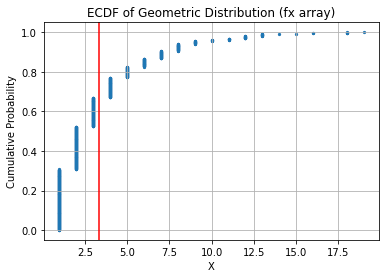

In [54]:
# Call the ECDF function
ecdf(fx, "#1f77b4")
plt.axvline(np.mean(fx), color="red")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title('ECDF of Geometric Distribution (fx array)')
plt.grid()

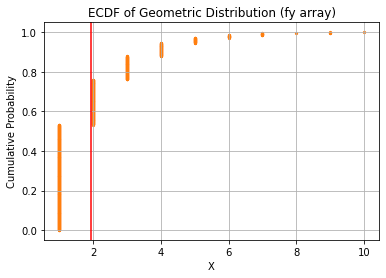

In [55]:
# Call the ECDF function
ecdf(fy, "#ff7f0e")
plt.axvline(np.mean(fy), color="red")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title('ECDF of Geometric Distribution (fy array)')
plt.grid()

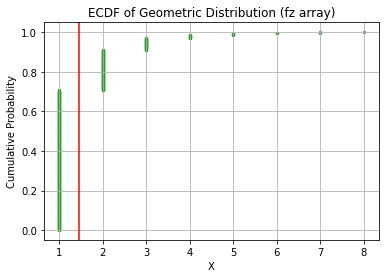

In [56]:
# Call the ECDF function
ecdf(fz, "#2ca02c")
plt.axvline(np.mean(fz), color="red")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title('ECDF of Geometric Distribution (fz array)')
plt.grid()

The plot below illustrates the ECDF of each array combined to help visualise how different probabilities of success affect the distribution of the data.

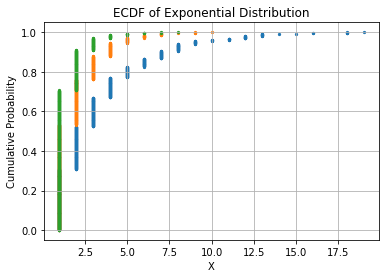

In [57]:
# Call the ECDF function for each array
ecdf(fx, "#1f77b4"), ecdf(fy, "#ff7f0e"), ecdf(fz, "#2ca02c")
plt.xlabel('X'), plt.ylabel('Cumulative Probability'), plt.title('ECDF of Exponential Distribution')
plt.grid()

The kernel density plot below shows how the probability density is much higher at a higher *p* value and tapers off quite quickly for higher values of x.

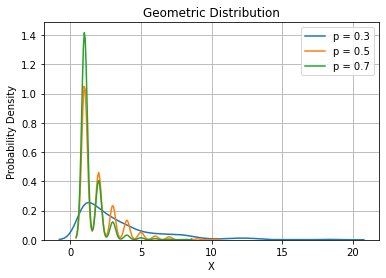

In [58]:
# Plot the three arrays with different probabilities of success
sns.distplot(fx, label="p = 0.3", hist=False)
sns.distplot(fy, label="p = 0.5", hist=False)
sns.distplot(fz, label="p = 0.7", hist=False)
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Geometric Distribution")
plt.grid()

As shown in the ECDF plots, the histograms below show how most of the data is skewed left in each array. As this is a discrete distribution, there are notable gaps in the histograms. This is because a histogram is typically meant to illustrate the frequency distribution of a continuous numeric variable. [51]

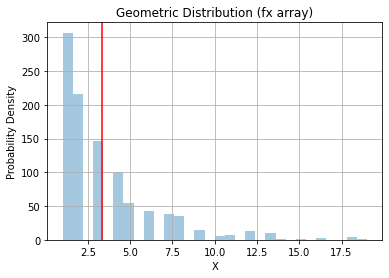

In [59]:
# Plot a histogram of the array
sns.distplot(fx, kde=False, color="#1f77b4")
plt.axvline(np.mean(fx), color="red")
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Geometric Distribution (fx array)")
plt.grid()

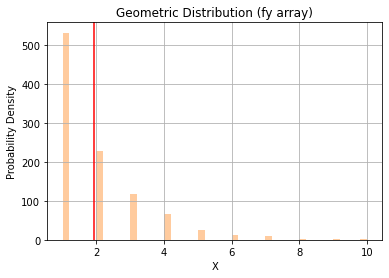

In [60]:
# Plot a histogram of the array
sns.distplot(fy, kde=False, color="#ff7f0e")
plt.axvline(np.mean(fy), color="red")
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Geometric Distribution (fy array)")
plt.grid()

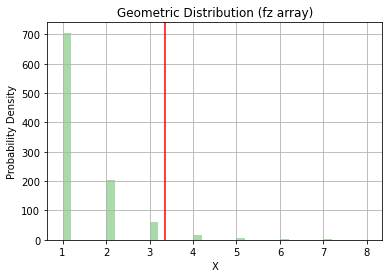

In [61]:
# Plot a histogram of the array
sns.distplot(fz, kde=False, color="#2ca02c")
plt.axvline(np.mean(fx), color="red")
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Geometric Distribution (fz array)")
plt.grid()

#### 4.4. normal([loc, scale, size])

This function draws samples from a normal (Gaussian) distribution. It is one of the most important distributions and fits the probability distribution of many events, e.g. IQ scores, heartbeat etc. It has three parameters. *loc* (mean) is where the peak of the bell exists, *scale* (standard deviation) is how flat the graph distribution should be, and *size* is the shape of the returned array [36]

The probability density function can be expressed as:

$f(x) = \frac{e^-(x-\mu)^2/(2\sigma^2)}{\sigma\sqrt2\pi}$

where $\mu$ is the location parameter and $\sigma$ is the scale parameter. The case where $\mu = 0$ and $\sigma = 1$ is called the standard normal distribution. [37]

As illustrated in the previous distributions, data can be distributed in different ways. However, there are cases where data tends to be around a central value with no bias left or right. In a normal distribution, 50% of the values are less than the mean and 50% are greater than the mean. [38]

The ```normal()``` function below creates three arrays of the same size with different mean values.

In [63]:
# Construct a new Generator
rng = np.random.default_rng()
# Create three arrays with different mean values
gx = rng.normal(loc=0, scale=2, size=(10, 30))
gy = rng.normal(loc=5, scale=2, size=(10, 30))
gz = rng.normal(loc=10, scale=2, size=(10, 30))
# Print the first array
print(gx)

[[ 1.19151526e+00 -3.50425576e+00 -2.02759655e+00 -8.31274429e-01
  -7.14547765e-02 -6.99994227e-02  3.06222905e+00  7.32896382e-02
   3.70472159e+00 -1.73329058e+00  8.39476973e-01  4.29095736e+00
  -7.57639140e-01  6.36286909e-02  8.94214745e-01 -2.04924833e+00
  -3.19071621e-01  2.88602729e+00 -1.19641458e+00  4.31358569e+00
   1.40030322e-01 -1.20755539e-01  6.05136161e-01 -2.57922792e+00
  -3.14519104e+00  2.01219219e-02  1.39821002e+00 -3.01017960e+00
   3.49698033e+00 -3.19738323e-03]
 [ 1.19277043e+00 -3.10023651e+00 -6.69460847e-01  1.91089147e+00
  -7.83979149e-01  7.03198880e-01  1.10052962e+00 -1.58289849e+00
  -5.33619569e-01  7.94920699e-01 -3.02536486e-02 -2.42787569e+00
  -4.01586361e-01 -3.29517690e+00  1.30216049e+00 -2.86753819e-01
   9.14171496e-01 -1.42487543e+00 -1.54840174e+00  6.05155109e-01
   5.06297976e+00  8.76706704e-01  1.42021943e+00  3.60895325e+00
  -1.87127063e+00 -1.13018111e-01  5.06642538e+00  1.73110107e+00
  -7.36870878e-01 -5.35406146e-01]
 [ 3.4

In [64]:
# Find the mean value of each array
print("Mean of gx array: ", np.mean(gx))
print("Mean of gy array: ", np.mean(gy))
print("Mean of gz array: ", np.mean(gz))

Mean of gx array:  0.13279902152807993
Mean of gy array:  5.070588318538501
Mean of gz array:  9.989984503890222


The ECDF of the distributions show how evenly distributed the data is. The three plots below illustrate the ECDF of each array individually, with the mean indicated by a red line.

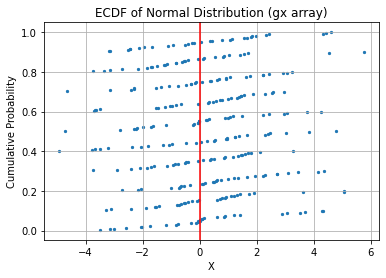

In [65]:
# Call the ECDF function
ecdf(gx, "#1f77b4")
# Draw a vertical line to indicate the mean
plt.axvline(0, color="red")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title('ECDF of Normal Distribution (gx array)')
plt.grid()

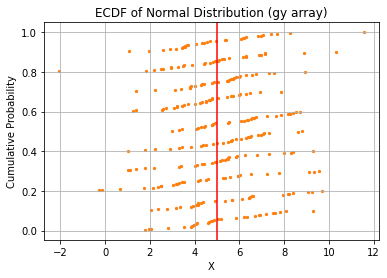

In [66]:
# Call the ECDF function
ecdf(gy, "#ff7f0e")
# Draw a vertical line to indicate the mean
plt.axvline(5, color="red")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title('ECDF of Normal Distribution (gy array)')
plt.grid()

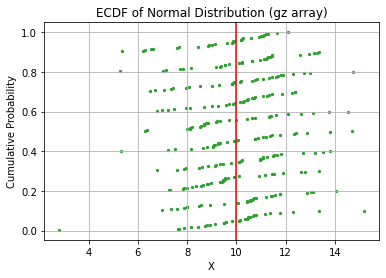

In [67]:
# Call the ECDF function
ecdf(gz, "#2ca02c")
# Draw a vertical line to indicate the mean
plt.axvline(10, color="red")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title('ECDF of Normal Distribution (gz array)')
plt.grid()

The plot below illustrates the ECDF of each array combined.

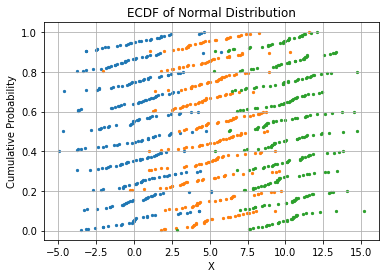

In [68]:
# Call the ECDF function for each array
ecdf(gx, "#1f77b4"), ecdf(gy, "#ff7f0e"), ecdf(gz, "#2ca02c")
plt.xlabel('X'), plt.ylabel('Cumulative Probability'), plt.title('ECDF of Normal Distribution')
plt.grid()

The kernel density plot below shows how symmetrical each of the arrays are.

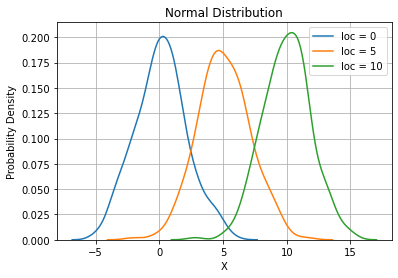

In [69]:
# Plot the three arrays with different mean values
sns.distplot(gx, label="loc = 0", hist=False)
sns.distplot(gy, label="loc = 5", hist=False)
sns.distplot(gz, label="loc = 10", hist=False)
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Normal Distribution")
plt.grid()

As shown in the ECDF plots, the histograms below show how the data near the mean are more frequent in occurrence than data far from the mean, which produces a symmetric, unimodal distribution.

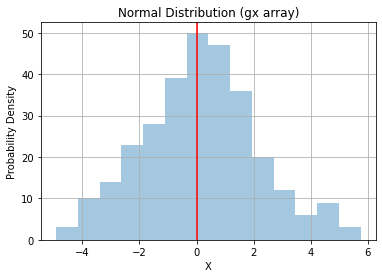

In [70]:
# Plot a histogram of the array
sns.distplot(gx, kde=False, color="#1f77b4")
# Draw a vertical line to indicate the mean
plt.axvline(0, color="red")
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Normal Distribution (gx array)")
plt.grid()

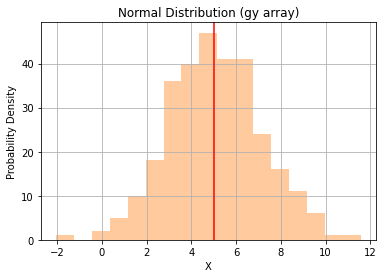

In [71]:
# Plot a histogram of the array
sns.distplot(gy, kde=False, color="#ff7f0e")
# Draw a vertical line to indicate the mean
plt.axvline(5, color="red")
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Normal Distribution (gy array)")
plt.grid()

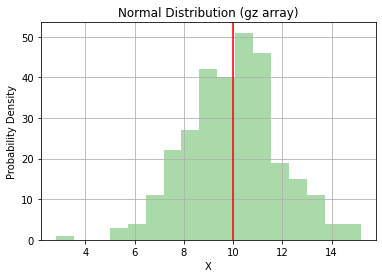

In [72]:
# Plot a histogram of the array
sns.distplot(gz, kde=False, color="#2ca02c")
# Draw a vertical line to indicate the mean
plt.axvline(10, color="red")
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Normal Distribution (gz array)")
plt.grid()

The function below creates three arrays of the same size and mean, but with different *scale* (standard deviation) values. As illustrated in the kernel density plot, the distribution becomes flatter when increasing the *scale* value.

In [74]:
# Construct a new Generator
rng = np.random.default_rng()
# Create three arrays with different scales
gx_a = rng.normal(loc=0, scale=2, size=(10, 30))
gy_b = rng.normal(loc=0, scale=4, size=(10, 30))
gz_c = rng.normal(loc=0, scale=6, size=(10, 30))
# Print the first array
print(gx_a)

[[ 1.36646687e+00 -9.88474406e-01  2.57294401e+00  4.42122671e-01
   5.50771884e+00 -2.85201154e+00  1.56715239e+00 -1.87410720e+00
  -1.84858084e+00 -1.42639264e+00  5.57493367e-01 -4.92472582e+00
   2.04604524e+00 -1.46742694e-01  1.14629934e+00 -4.41529601e-01
   1.51099738e+00 -1.41978462e+00 -1.42988795e-01 -3.93869416e-01
  -2.48195701e-02  1.55580576e+00  1.09585213e+00  1.49295645e-02
   1.83052974e+00 -1.03051418e+00  2.76801547e+00  1.17860781e+00
  -3.87830684e-01  1.00431759e+00]
 [-2.66993777e+00 -2.13071463e-01  2.94926540e+00  9.23370483e-01
   2.00200537e+00  1.95721397e+00 -1.57715974e+00 -1.60774616e+00
  -1.95634576e+00 -6.84300289e-01  1.01868069e+00 -3.11625342e+00
   1.45302571e+00 -3.26289279e+00 -4.45595044e+00  1.32321727e+00
   3.47200888e-01  2.15442793e+00 -4.06116220e+00 -1.41865548e+00
  -7.15776839e-01 -2.35025206e+00 -1.58123760e+00 -1.77614660e+00
   2.66874287e+00  3.77820525e+00  2.38085259e+00 -3.49832753e+00
   3.32162178e+00 -8.73272172e-01]
 [ 1.3

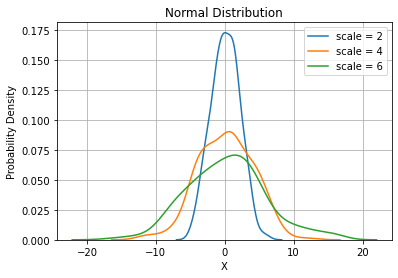

In [75]:
# Plot the three arrays with different scales
sns.distplot(gx_a, label="scale = 2", hist=False)
sns.distplot(gy_b, label="scale = 4", hist=False)
sns.distplot(gz_c, label="scale = 6", hist=False)
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Normal Distribution")
plt.grid()

#### 4.5. rayleigh([scale, size])

This function draws samples from a rayleigh distribution. The rayleigh distribution is used in signal processing. It can also be used in engineering to measure the lifetime of an object, where the lifetime depends on the age of the object. [39] It has two parameters, *scale* and *size*. [40]

The probability density function can be expressed as:

$f(x;\sigma) = \frac{x}{\sigma^2}e^{-x^2/(2\sigma^2)}$

where $\sigma$ is the scale parameter of the distribution. [41]

The ```rayleigh()``` function below creates three arrays of the same size with different scales.

In [76]:
# Create three arrays with different scales
hx = rng.rayleigh(scale=2, size=(10, 30))
hy = rng.rayleigh(scale=4, size=(10, 30))
hz = rng.rayleigh(scale=6, size=(10, 30))
print(hx)

[[3.19050192 6.72576601 1.58288656 3.6627286  3.27110532 1.43356548
  3.62777679 2.59040544 0.40807036 0.92043491 4.73852657 3.45883122
  0.66965654 2.4630303  2.47239609 0.92029451 3.39832954 1.05777987
  0.88736907 3.30036633 3.28377653 1.87549327 2.76375394 0.70030084
  3.23654178 1.5217628  3.09919197 3.28532115 2.74474295 5.93935566]
 [2.95672195 1.89694379 5.70701102 4.25674178 1.99024391 1.97244844
  2.64351689 1.58726836 3.63358287 4.80838811 1.97280544 5.23236697
  2.95052858 4.26202317 0.74418682 2.01722011 3.34007714 1.36874311
  4.80145449 2.84825694 1.9436932  3.62846324 3.95512384 1.64042015
  4.22861953 0.83360507 3.23454524 0.87979018 1.5830793  2.59810808]
 [5.12182681 1.43403122 4.02541406 6.56583587 0.07928529 0.64133369
  2.41478352 2.57693974 3.7073672  1.27223028 1.41511273 3.78956309
  2.45931707 6.74669137 3.31500982 2.37980702 2.89212818 2.38989619
  3.63191564 1.61352522 1.47654749 0.28855849 3.52035129 4.72544439
  3.42292629 4.90018086 4.80587824 2.9124393  

In [77]:
print("Mean of hx array: ", np.mean(hx))
print("Mean of hy array: ", np.mean(hy))
print("Mean of hz array: ", np.mean(hz))

Mean of hx array:  2.6165933775129617
Mean of hy array:  5.004669393674777
Mean of hz array:  7.56787221956256


The three plots below illustrate the ECDF of each array individually, with the mean indicated by a red line.

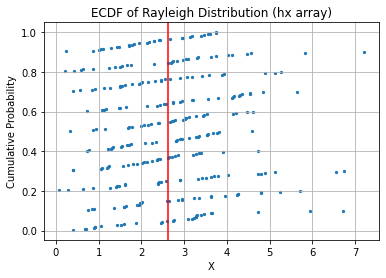

In [78]:
# Call the ECDF function
ecdf(hx, "#1f77b4")
# Draw a vertical line to indicate the mean
plt.axvline(np.mean(hx), color="red")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title('ECDF of Rayleigh Distribution (hx array)')
plt.grid()

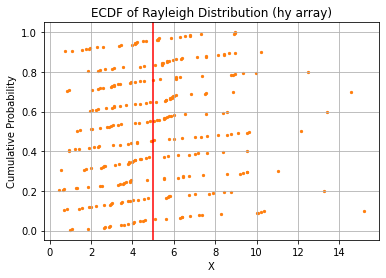

In [79]:
# Call the ECDF function
ecdf(hy, "#ff7f0e")
# Draw a vertical line to indicate the mean
plt.axvline(np.mean(hy), color="red")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title('ECDF of Rayleigh Distribution (hy array)')
plt.grid()

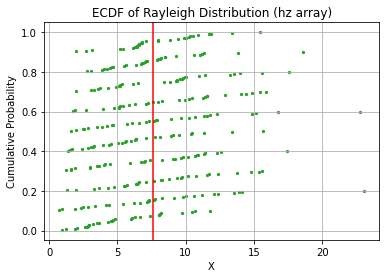

In [80]:
# Call the ECDF function
ecdf(hz, "#2ca02c")
# Draw a vertical line to indicate the mean
plt.axvline(np.mean(hz), color="red")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title('ECDF of Rayleigh Distribution (hz array)')
plt.grid()

The plot below illustrates the ECDF of each array combined to help visualise how different scales affect the distribution of the data.

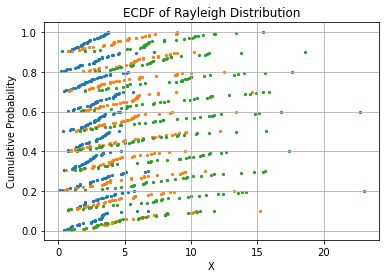

In [81]:
# Call the ECDF function for each array
ecdf(hx, "#1f77b4"), ecdf(hy, "#ff7f0e"), ecdf(hz, "#2ca02c")
plt.xlabel('X'), plt.ylabel('Cumulative Probability'), plt.title('ECDF of Rayleigh Distribution')
plt.grid()

The kernel density plot below shows how as the *scale* parameter increases, the distribution gets wider.

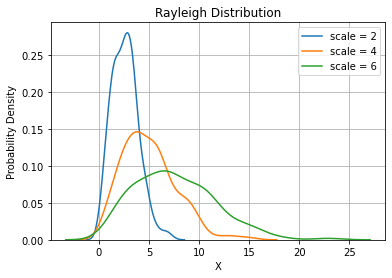

In [82]:
# Plot the three arrays with different scales
sns.distplot(hx, label="scale = 2", hist=False)
sns.distplot(hy, label="scale = 4", hist=False)
sns.distplot(hz, label="scale = 6", hist=False)
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Rayleigh Distribution")
plt.grid()

As shown in the ECDF plots, the histograms below show how the data near the mean are more frequent in occurrence than data far from the mean. However, it is apparent that the distribution in each array is skewed slightly to the left of the mean.

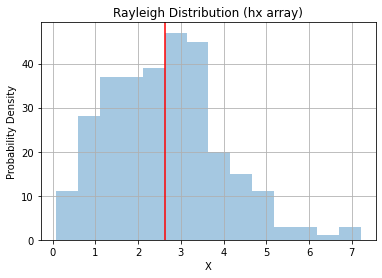

In [83]:
# Plot a histogram of the array
sns.distplot(hx, kde=False, color="#1f77b4")
# Draw a vertical line to indicate the mean
plt.axvline(np.mean(hx), color="red")
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Rayleigh Distribution (hx array)")
plt.grid()

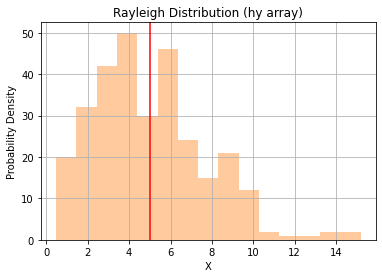

In [84]:
# Plot a histogram of the array
sns.distplot(hy, kde=False, color="#ff7f0e")
# Draw a vertical line to indicate the mean
plt.axvline(np.mean(hy), color="red")
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Rayleigh Distribution (hy array)")
plt.grid()

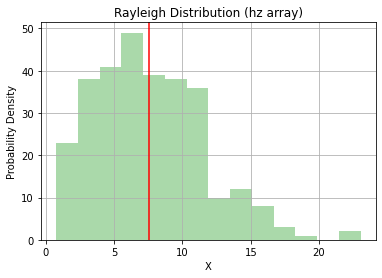

In [85]:
# Plot a histogram of the array
sns.distplot(hz, kde=False, color="#2ca02c")
# Draw a vertical line to indicate the mean
plt.axvline(np.mean(hz), color="red")
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Rayleigh Distribution (hz array)")
plt.grid()

#### 4.6. standard_t(df[, size])

This function draws samples from a standard Student's t distribution with *df* degrees of freedom. It shares similar characteristics with the normal distribution, with its bell shape. However, it has a greater chance for extreme values, giving lower probability to the centre and a higher probability to the tails than the standard normal distribution. [42][43]

The probability density function can be expressed as:

$f(t) = \frac{\Gamma(\frac{\nu+1}{2})} {\sqrt{\nu\pi}\,\Gamma(\frac{\nu}{2})} \left(1+\frac{t^2}{\nu} \right)^{\!-\frac{\nu+1}{2}}\!$

where $\nu$ is the number of degrees of freedom and $\Gamma$ is the gamma function. [44] 

The ```standard_t()``` function below creates three arrays of the same size with different degrees of freedom.

In [86]:
# Create three arrays with different degrees of freedom
ix = rng.standard_t(2, 100)
iy = rng.standard_t(40, 100)
iz = rng.standard_t(100, 100)
# Print the first array
print(ix)

[ 2.12977084  0.94571181 -0.55692042  0.6342408  -0.94913362  0.47456448
 -0.53038135 -0.96925891  0.08203962 -1.40679536  0.27461122 -1.81055947
  0.64680863 -0.26318705  0.2412023  -0.82293857 -0.06329249 -0.39560392
  0.66252512 -0.3955281  -0.53035591 -1.92063652  1.27827307 -0.65558759
  0.4939086  -0.11874465  0.51965612 -3.04494262 -0.66310639 -5.28948217
 -0.411872   -0.69297062  0.57254676  2.39612262 -7.34833863  0.38899955
  0.9989453   0.66012643  0.99962662  0.52295804  0.2363941  -1.74316166
  0.56048709 -0.36005108  0.12627826  1.91159027 -0.26954124  1.02735805
 -4.13887225  0.50211456  0.37600444  0.47099437 -0.04113039 -2.42658268
  0.12879137 -1.05318953 -0.01954556 -1.83552011  0.46289437 -0.14535856
  1.13585339  0.87179876 -2.66265751 -1.81615721 -0.21705401  0.88429406
 -0.03817648  3.19532548  0.20416685  0.55422985  0.98389172  0.10244286
 -0.49371738 -1.31144128 -0.25880151 -0.56813176 -0.21538553 -0.06349286
  2.69123481 -0.17507515 -0.41347864  0.39691851 -0

As shown below, the mean of all three arrays is approximately zero.

In [87]:
print("Mean of ix array: ", np.mean(ix))
print("Mean of iy array: ", np.mean(iy))
print("Mean of iz array: ", np.mean(iz))

Mean of ix array:  -0.17367369327446222
Mean of iy array:  -0.18842209699776352
Mean of iz array:  0.0037594943169708484


The three plots below illustrate the ECDF of each array individually, with the mean indicated by a red line.

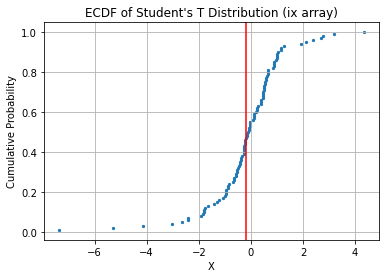

In [88]:
# Call the ECDF function
ecdf(ix, "#1f77b4")
# Draw a vertical line to indicate the mean
plt.axvline(np.mean(ix), color="red")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title('ECDF of Student\'s T Distribution (ix array)')
plt.grid()

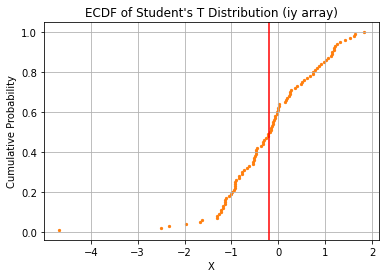

In [89]:
# Call the ECDF function
ecdf(iy, "#ff7f0e")
# Draw a vertical line to indicate the mean
plt.axvline(np.mean(iy), color="red")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title('ECDF of Student\'s T Distribution (iy array)')
plt.grid()

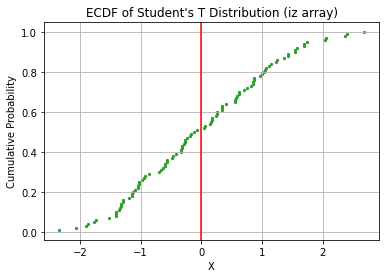

In [90]:
# Call the ECDF function
ecdf(iz, "#2ca02c")
# Draw a vertical line to indicate the mean
plt.axvline(np.mean(iz), color="red")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title('ECDF of Student\'s T Distribution (iz array)')
plt.grid()

The plot below illustrates the ECDF of each array combined to help visualise how different degrees of freedom affect the distribution of the data.

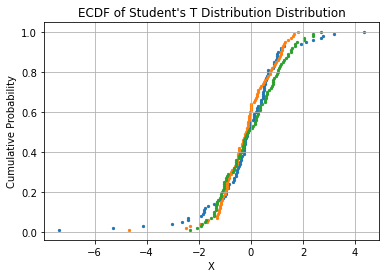

In [91]:
# Call the ECDF function for each array
ecdf(ix, "#1f77b4"), ecdf(iy, "#ff7f0e"), ecdf(iz, "#2ca02c")
plt.xlabel('X'), plt.ylabel('Cumulative Probability'), plt.title('ECDF of Student\'s T Distribution Distribution')
plt.grid()

The kernel density plot below shows how similar the distribution is to a standard normal distribution.

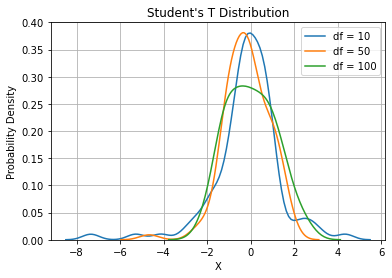

In [92]:
# Plot the three arrays with different degrees of freedom
sns.distplot(ix, label="df = 10", hist=False)
sns.distplot(iy, label="df = 50", hist=False)
sns.distplot(iz, label="df = 100", hist=False)
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Student's T Distribution")
plt.grid()

The histograms below illustrate how as the *df* gets larger, the distribution starts to resemble a standard normal distribution.

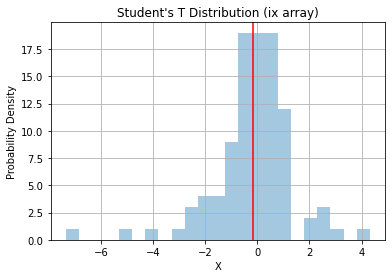

In [93]:
# Plot a histogram of the array
sns.distplot(ix, kde=False, color="#1f77b4")
# Draw a vertical line to indicate the mean
plt.axvline(np.mean(ix), color="red")
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Student's T Distribution (ix array)")
plt.grid()

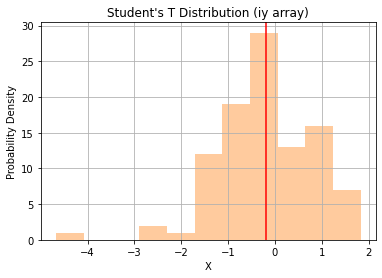

In [94]:
# Plot a histogram of the array
sns.distplot(iy, kde=False, color="#ff7f0e")
# Draw a vertical line to indicate the mean
plt.axvline(np.mean(iy), color="red")
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Student's T Distribution (iy array)")
plt.grid()

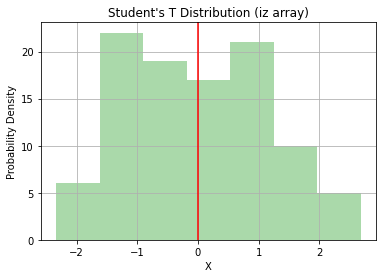

In [95]:
# Plot a histogram of the array
sns.distplot(iz, kde=False, color="#2ca02c")
# Draw a vertical line to indicate the mean
plt.axvline(np.mean(iz), color="red")
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Student's T Distribution (iz array)")
plt.grid()

#### 4.7. triangular(left, mode, right[, size])

This function draws samples from the triangular distribution over the interval ```[left, right]```. The function returns a random floating number between the two specified numbers, but a third parameter (the mode) can also be specified. Unlike other distributions, these parameters directly define the shape of the probability density function. [45] Business applications such as simulation and project management sometimes use a triangular distribution to create models when limited sample data exists. [46]

The ```triangular()``` function below creates three arrays of the same size with different mode values.

In [96]:
# Create three arrays with different mode values
jx = rng.triangular(10, 10, 50, 1000)
jy = rng.triangular(10, 30, 50, 1000)
jz = rng.triangular(10, 50, 50, 1000)
# Print the first array
print(jx)

[43.36287004 12.77573752 23.03065386 20.06023211 42.62274409 13.02094194
 38.84090152 27.56683002 21.95492196 21.73493736 32.68131437 26.49969106
 14.88912367 11.57730826 47.1887859  24.64946643 26.93244167 20.5247927
 35.8780679  29.82357606 25.47831339 16.93099011 46.89356966 12.02753446
 10.78965379 16.22706556 24.55745108 12.22073856 21.13313099 14.63940848
 17.39536465 34.59477828 38.88857384 13.28600179 15.05237359 16.34695437
 27.18983775 32.10666373 20.26666908 14.96519119 19.23122482 30.54559265
 21.02356804 11.18584641 26.4013543  36.90350079 19.33386048 12.85962576
 20.18674455 23.51798224 22.05231124 32.77610348 15.68882129 12.70368136
 33.19028991 20.76154925 13.90759025 27.0327235  10.52627622 23.38705234
 24.48498234 12.05735958 12.65143116 28.26514467 16.94836844 23.25084661
 17.3597302  10.8394505  18.7238179  23.37535513 35.54525512 20.34196347
 10.87663208 49.17373639 31.21065525 22.28821018 20.26578303 17.26104802
 17.93291041 22.50077467 21.93640535 10.99523511 33.

In [97]:
# Find the mean value of each array
print("Mean of jx array: ", np.mean(jx))
print("Mean of jy array: ", np.mean(jy))
print("Mean of jz array: ", np.mean(jz))

Mean of jx array:  23.110653101556423
Mean of jy array:  30.049518219355
Mean of jz array:  37.04058101864735


The three plots below illustrate the ECDF of each array individually, with the mean indicated by a red line. Again, the ECDF is very similar to that of the student's t distribution.

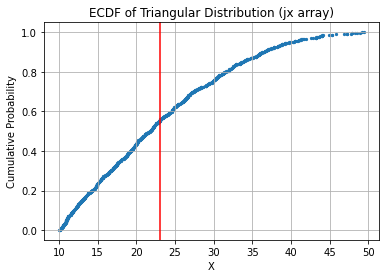

In [98]:
# Call the ECDF function
ecdf(jx, "#1f77b4")
# Draw a vertical line to indicate the mean
plt.axvline(np.mean(jx), color="red")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title('ECDF of Triangular Distribution (jx array)')
plt.grid()

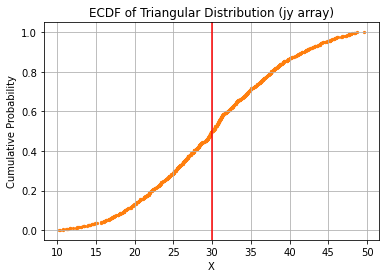

In [99]:
# Call the ECDF function
ecdf(jy, "#ff7f0e")
# Draw a vertical line to indicate the mean
plt.axvline(np.mean(jy), color="red")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title('ECDF of Triangular Distribution (jy array)')
plt.grid()

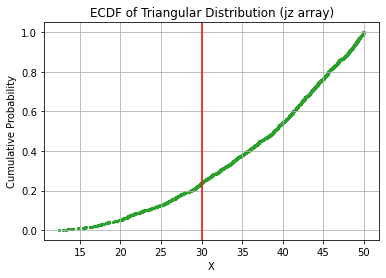

In [100]:
# Call the ECDF function
ecdf(jz, "#2ca02c")
# Draw a vertical line to indicate the mean
plt.axvline(np.mean(jy), color="red")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title('ECDF of Triangular Distribution (jz array)')
plt.grid()

The plot below illustrates the ECDF of each array combined to help visualise how different mode values affect the distribution of the data.

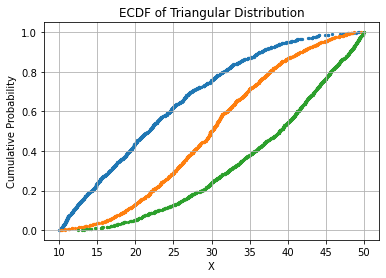

In [101]:
# Call the ECDF function for each array
ecdf(jx, "#1f77b4"), ecdf(jy, "#ff7f0e"), ecdf(jz, "#2ca02c")
plt.xlabel('X'), plt.ylabel('Cumulative Probability'), plt.title('ECDF of Triangular Distribution')
plt.grid()

The kernel density plot below shows how as the mode increases, the distribution skews further to the right.

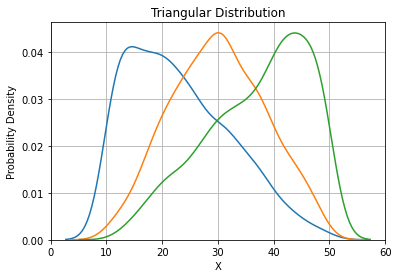

In [102]:
# Plot the three arrays with different intervals
sns.distplot(jx, hist=False)
sns.distplot(jy, hist=False)
sns.distplot(jz, hist=False)
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Triangular Distribution")
plt.grid()

The histograms below illustrate how the distributions have a triangular shape.

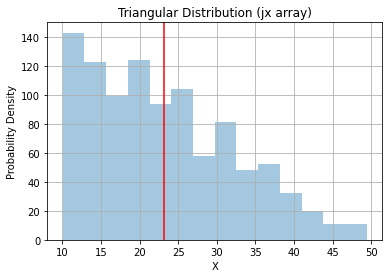

In [103]:
# Plot a histogram of the array
sns.distplot(jx, kde=False, color="#1f77b4")
# Draw a vertical line to indicate the mean
plt.axvline(np.mean(jx), color="red")
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Triangular Distribution (jx array)")
plt.grid()

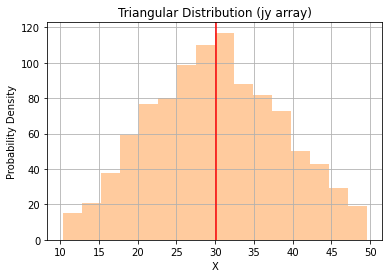

In [104]:
# Plot a histogram of the array
sns.distplot(jy, kde=False, color="#ff7f0e")
# Draw a vertical line to indicate the mean
plt.axvline(np.mean(jy), color="red")
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Triangular Distribution (jy array)")
plt.grid()

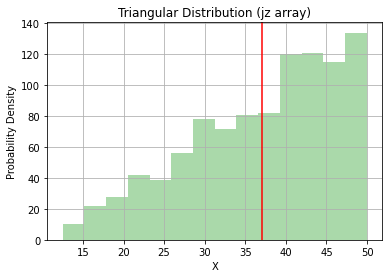

In [105]:
# Plot a histogram of the array
sns.distplot(jz, kde=False, color="#2ca02c")
# Draw a vertical line to indicate the mean
plt.axvline(np.mean(jz), color="red")
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Triangular Distribution (jz array)")
plt.grid()

As illustrated in the histogram below, by creating a much larger array, the triangular shape of the distribution is more apparent.

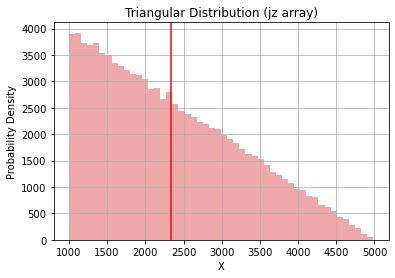

In [106]:
# Create an array
jw = rng.triangular(1000, 1000, 5000, 100000)
# Plot a histogram of the array
sns.distplot(jw, kde=False, color="#d62728")
# Draw a vertical line to indicate the mean
plt.axvline(np.mean(jw), color="red")
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Triangular Distribution (jz array)")
plt.grid()

#### 4.8. uniform([low, high, size])

This function draws samples from a uniform distribution. It returns a random floating number between two specified numbers (both inclusive). [47]

In [107]:
# Create three arrays with different intervals
kx = rng.uniform(40, 30, 10000)
ky = rng.uniform(60, 30, 10000)
kz = rng.uniform(80, 30, 10000)
# Print the first array
print(kx)

[38.01190022 38.55436798 36.77115994 ... 31.92495876 32.57220534
 37.68986101]


In [108]:
# Find the mean value of each array
print(np.mean(kx))
print(np.mean(ky))
print(np.mean(kz))

34.972024560668416
45.0781756751773
54.96443311634413


The three plots below illustrate the ECDF of each array individually, with the mean indicated by a red line. In contrast to the triangular distribution, which has a curved line, the uniform distribution is straight.

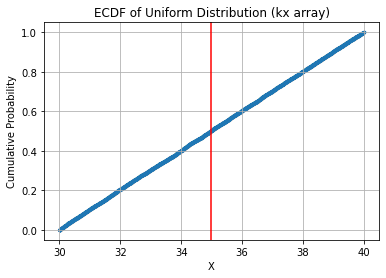

In [109]:
# Call the ECDF function
ecdf(kx, "#1f77b4")
# Draw a vertical line to indicate the mean
plt.axvline(np.mean(kx), color="red")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title('ECDF of Uniform Distribution (kx array)')
plt.grid()

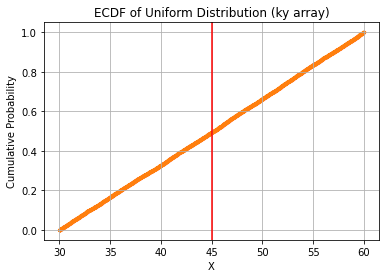

In [110]:
# Call the ECDF function
ecdf(ky, "#ff7f0e")
# Draw a vertical line to indicate the mean
plt.axvline(np.mean(ky), color="red")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title('ECDF of Uniform Distribution (ky array)')
plt.grid()

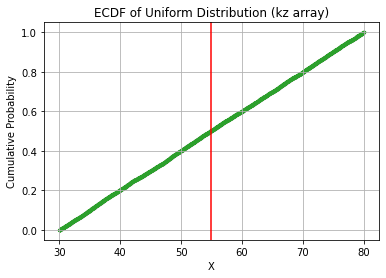

In [111]:
# Call the ECDF function
ecdf(kz, "#2ca02c")
# Draw a vertical line to indicate the mean
plt.axvline(np.mean(kz), color="red")
plt.xlabel("X"), plt.ylabel("Cumulative Probability"), plt.title('ECDF of Uniform Distribution (kz array)')
plt.grid()

The plot below illustrates the ECDF of each array combined to help visualise how a different *low* value affects the distribution of the data.

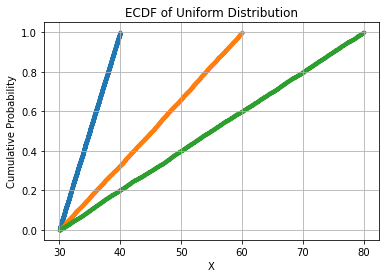

In [112]:
# Call the ECDF function for each array
ecdf(kx, "#1f77b4"), ecdf(ky, "#ff7f0e"), ecdf(kz, "#2ca02c")
plt.xlabel('X'), plt.ylabel('Cumulative Probability'), plt.title('ECDF of Uniform Distribution')
plt.grid()

The kernel density plot below shows how the probability density is almost equal across the distributions, particular those with a larger *low* value.

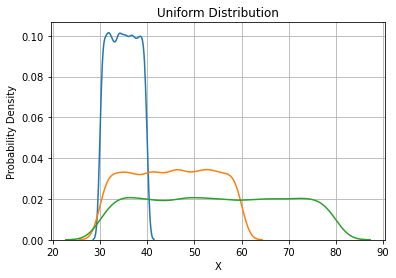

In [113]:
# Plot the three arrays with different intervals
sns.distplot(kx, hist=False)
sns.distplot(ky, hist=False)
sns.distplot(kz, hist=False)
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Uniform Distribution")
plt.grid()

It is apparent from the histograms below that the numbers generated by the function tend to be approximately equally distributed, meaning that theyre is no part of the interval with more random numbers than other parts. 

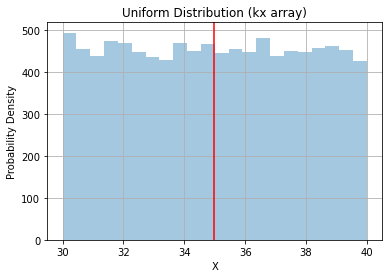

In [114]:
# Plot a histogram of the array
sns.distplot(kx, kde=False, color="#1f77b4")
# Draw a vertical line to indicate the mean
plt.axvline(np.mean(kx), color="red")
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Uniform Distribution (kx array)")
plt.grid()

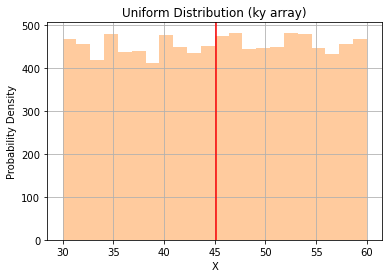

In [115]:
# Plot a histogram of the array
sns.distplot(ky, kde=False, color="#ff7f0e")
# Draw a vertical line to indicate the mean
plt.axvline(np.mean(ky), color="red")
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Uniform Distribution (ky array)")
plt.grid()

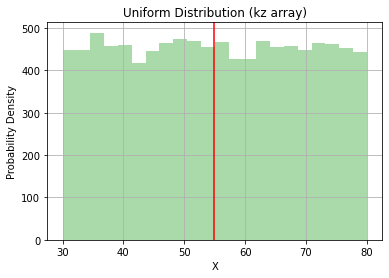

In [116]:
# Plot a histogram of the array
sns.distplot(kz, kde=False, color="#2ca02c")
# Draw a vertical line to indicate the mean
plt.axvline(np.mean(kz), color="red")
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Uniform Distribution (kz array)")
plt.grid()

It is evident from the histograms above that some intervals get slightly more random numbers than others. However, as the size grows, the distribution of the random numbers becomes more equal among intervals. The histogram below shows how a larger distribution looks more even.

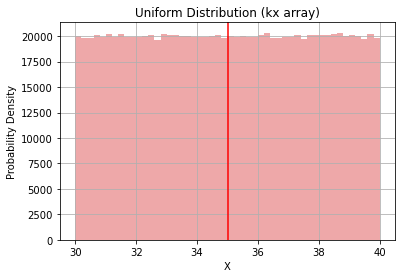

In [117]:
# Create an array
kw = rng.uniform(40, 30, 1000000)
# Plot a histogram of the array
sns.distplot(kw, kde=False, color="#d62728")
# Draw a vertical line to indicate the mean
plt.axvline(np.mean(kw), color="red")
plt.xlabel("X"), plt.ylabel("Probability Density"), plt.title("Uniform Distribution (kx array)")
plt.grid()

<br>

### 5. Seeds
***
A random seed is a number used to initialise a pseudorandom number generator. The number sequence of this generator is completely determined by the seed, and therefore if the generator is reinitialised with the same seed, it will produce the same sequence of numbers. [48]

In the superseded version of NumPy, the algorithm used to call random number generator functions, such as ```np.random.normal()```, was the Mersenne Twister. It has been a widely used and reliable means of random number generation. However, in the latest version, the ```numpy.random``` module offers random number generators with better statistical performance than the legacy MT19937 used in ```RandomState```, with the default set to the PCG64 generator. By calling ```default_rng()```, a new instance of a Generator is obtained, providing access to a wide range of distributions. [49]
 
A permuted congruential generator (PCG) applies an output permutation function to improve the statistical properties of a modulo-$2^n$ linear congruential generator with small and fast code, and small state size. PCG64 is a 128-bit implementation of O'Neill's permuted congruential generator. It has a period of $2^{128}$ and supports advancing an arbitrary number of steps. Random variates are generated by permuting the output of a 128-bit LCG. [50]

To demonstrate that random number generation is deterministic, the code below will explicitly seed the random number generator to 500 to illustrate that the same random numbers are generated. However, the sequence of numbers appears to lack any pattern, and therefore they can be considered random.

In [118]:
# Construct a new Generator
rng = np.random.default_rng(seed=500)
# Create a random uniform distribution comprising 10 floats
rng.uniform(size=10)

array([0.56674314, 0.85397799, 0.6453572 , 0.41115681, 0.46803194,
       0.82136122, 0.31252317, 0.78622079, 0.43555016, 0.24763021])

When the code is run again, but with an additional five floats, the random number sequence of the first 10 floats is exactly the same.

In [119]:
# Construct a new Generator
rng = np.random.default_rng(seed=500)
# Create a random uniform distribution comprising 10 floats
rng.uniform(size=15)

array([0.56674314, 0.85397799, 0.6453572 , 0.41115681, 0.46803194,
       0.82136122, 0.31252317, 0.78622079, 0.43555016, 0.24763021,
       0.44214554, 0.89695158, 0.5570242 , 0.52864422, 0.27598204])

If a different seed is used, completely different random numbers are generated, as shown below.

In [120]:
# Construct a new Generator
rng = np.random.default_rng(seed=501)
# Create a random uniform distribution comprising 10 floats
rng.uniform(size=10)

array([0.99642636, 0.63956651, 0.41891136, 0.55933685, 0.86131897,
       0.9933856 , 0.07328868, 0.82888267, 0.15211456, 0.72558062])

When using the same seed in the PCG64 generator and legacy MT19937 generator, different random numbers are generated.

In [121]:
rng = np.random.default_rng(12345)
rng.random()

0.22733602246716966

In [122]:
from numpy.random import Generator, MT19937
rg = Generator(MT19937(12345))
rg.random()

0.37786929937474845

<br>

### 6. References
***
[1] University of Central Florida, *Python Lists vs. Numpy Arrays - What is the difference?* [online] Available at: https://webcourses.ucf.edu/courses/1249560/pages/python-lists-vs-numpy-arrays-what-is-the-difference

[2] DataCamp, *Random Number Generator Using Numpy* [online] Available at: https://www.datacamp.com/community/tutorials/numpy-random

[3] w3schools, *Random numbers in NumPy* [online] Available at: https://www.w3schools.com/python/numpy_random.asp

[4] Machine Learning Mastery, *How to Generate Random Numbers in Python* [online] Available at: https://machinelearningmastery.com/how-to-generate-random-numbers-in-python/

[5] Numpy, *Random Generator* [online] Available at: https://numpy.org/doc/stable/reference/random/generator.html

[6] NumPy, *numpy.random.Generator.integers* [online] Available at: https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html

[7] Wolfram MathWorld, *Discrete Uniform Distribution* [online] Available at: https://mathworld.wolfram.com/DiscreteUniformDistribution.html

[8] VrcAcademy, *Discrete Uniform Distribution* [online] Available at: https://vrcacademy.com/tutorials/discrete-uniform-distribution/

[9] Wolfram MathWorld, *Half-Closed Interval* [online] Available at: https://mathworld.wolfram.com/Half-ClosedInterval.html

[10] Wikipedia, *Interval (mathematics)* [online] Available at: https://en.wikipedia.org/wiki/Interval_(mathematics)

[11] NumPy, *numpy.random.Generator.random* [online] Available at: https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html

[12] NumPy, *numpy.mean* [online] Available at: https://numpy.org/doc/stable/reference/generated/numpy.mean.html

[13] Wikipedia, *Continuous uniform distribution* [online] Available at: https://en.wikipedia.org/wiki/Continuous_uniform_distribution

[14] NumPy, *numpy.random.Generator.choice* [online] Available at: https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html

[15] NumPy, *numpy.arange* [online] Available at: https://numpy.org/doc/stable/reference/generated/numpy.arange.html

[16] PYnative, *Python random.choice() function to select random item from a List and Set* [online] Available at: https://pynative.com/python-random-choice/

[17] Stack Overflow, *What does replacement mean in numpy.random.choice?* [online] Available at: https://stackoverflow.com/questions/40689152/what-does-replacement-mean-in-numpy-random-choice

[18] NumPy, *numpy.random.Generator.bytes* [online] Available at: https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.bytes.html

[19] PyProg, *numpy.random.bytes* [online] Available at: https://pyprog.pro/random_sampling_functions/bytes.html

[20] NumPy, *numpy.random.Generator.shuffle* [online] Available at: https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html

[21] w3schools, *Random permutation* [online] Available at: https://www.w3schools.com/python/numpy_random_permutation.asp

[22] Stack Overflow, *shuffle vs permute numpy* [online] Available at: https://stackoverflow.com/questions/15474159/shuffle-vs-permute-numpy

[23] cmdlinetips, *Empirical cumulative distribution function (ECDF) in Python* [online] Available at: https://cmdlinetips.com/2019/05/empirical-cumulative-distribution-function-ecdf-in-python/

[24] The Chemical Statistician, *Exploratory Data Analysis: Conceptual Foundations of Empirical Cumulative Distribution Functions* [online] Available at: https://chemicalstatistician.wordpress.com/2013/06/24/exploratory-data-analysis-conceptual-foundations-of-empirical-cumulative-distribution-functions/

[25] Wikipedia, *Chi-squared test* [online] Available at: https://en.wikipedia.org/wiki/Chi-squared_test

[26] w3schools, *Chi Square Distribution* [online] Available at: https://www.w3schools.com/python/numpy_random_chisquare.asp

[27] The Minitab Blog, *What Are Degrees of Freedom in Statistics?* [online] Available at: https://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-are-degrees-of-freedom-in-statistics

[28] Boston University School of Public Health, *Comparing Frequencies* [online] Available at: https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717_ComparingFrequencies/PH717_ComparingFrequencies2.html

[29] Online Statistics Education, *Chi Square Distribution* [online] Available at: http://onlinestatbook.com/2/chi_square/distribution.html

[30] w3schools, *Exponential Distribution* [online] Available at: https://www.w3schools.com/python/numpy_random_exponential.asp

[31] NumPy, *numpy.random.Generator.exponential* [online] Available at: https://numpy.org/doc/stable/reference/random/generated/numpy.random.exponential.html

[32] Math Insight, *The exponential function* [online] Available at: https://mathinsight.org/exponential_function

[33] Wikipedia, *Bernoulli trial* [online] Available at: https://en.wikipedia.org/wiki/Bernoulli_trial

[34] Wikipedia, *Geometric distribution* [online] Available at: https://en.wikipedia.org/wiki/Geometric_distribution

[35] Wolfram MathWorld, *Geometric Distribution* [online] Available at: https://mathworld.wolfram.com/GeometricDistribution.html 

[36] w3schools, *Normal (Gaussian) Distribution* [online] Available at: https://www.w3schools.com/python/numpy_random_normal.asp

[37] Engineering Statistics Handbook, *Normal Distribution* [online] Available at: https://www.itl.nist.gov/div898/handbook/eda/section3/eda3661.htm

[38] Maths is Fun Advanced, *Normal Distribution* [online] Available at: https://www.mathsisfun.com/data/standard-normal-distribution.html

[39] Statistics How To, *What is the Rayleigh Distribution?* [online] Available at: https://www.statisticshowto.com/rayleigh-distribution/

[40] w3schools, *Rayleigh Distribution* [online] Available at: https://www.w3schools.com/python/numpy_random_rayleigh.asp

[41] Wikipedia, *Rayleigh distribution* [online] Available at: https://en.wikipedia.org/wiki/Rayleigh_distribution

[42] Investopedia, *T Distribution Definition* [online] Available at: https://www.investopedia.com/terms/t/tdistribution.asp

[43] Scribbr, *T-distribution: What it is and how to use it* [online] Available at: https://www.scribbr.com/statistics/t-distribution/

[44] Wikipedia, *Student's t-distribution* [online] Available at: https://en.wikipedia.org/wiki/Student%27s_t-distribution

[45] NumPy, *numpy.random.triangular* [online] Available at: https://numpy.org/doc/stable/reference/random/generated/numpy.random.triangular.html

[46] MathWorks, *Nonparametric and Empirical Probability Distributions* [online] Available at: https://www.mathworks.com/help/stats/nonparametric-and-empirical-probability-distributions.html

[47] w3schools, *Python Random uniform() Method* [online] Available at: https://www.w3schools.com/python/ref_random_uniform.asp

[48] Wikipedia, *Random seed* [online] Available at: https://en.wikipedia.org/wiki/Random_seed

[49] W3cubDocs, *Random Generator* [online] Available at: https://docs.w3cub.com/numpy~1.17/random/generator/

[50] randomgen, *Permuted Congruential Generator (64-bit, PCG64)* [online] Available at: https://bashtage.github.io/randomgen/bit_generators/pcg64.html

[51] Chartio, *A Complete Guide to Histograms* [online] Available at: https://chartio.com/learn/charts/histogram-complete-guide/